The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
URY 16.82586234640158
USA 2565.1396400375093
ESP 2647.4171126361975
ARG 7.228217642909839
BRA 26.651679293096706
MEX 0.5430752515459532
PRY 0.05299064328662034
ITA 7333.482024489015
Country URY
For Centralized train error 2244.82702790982 and test error 196.95921270764345
For Independent train error 1081.6672874578396 and test error 201.19516955156558
For Parametric with epsilon 0.01 train error 2219.9079055806137 and test error 141.13243772932958
For Functional with epsilon 500 train error 2201.057220459923 and test error 131.5667840682156
Functional error 16.82586234640158
Country USA
For Centralized train error 1674258.8374786195 and test error 646323.1249295298
For Independent train error 1140128.6088544852 and test error 920483.0222151066
For Parametric with epsilon 0.01 train error 1325200214.889057 and test error 9918861.238111792
For Functional with epsilon 500 train error 1770129271.3937936

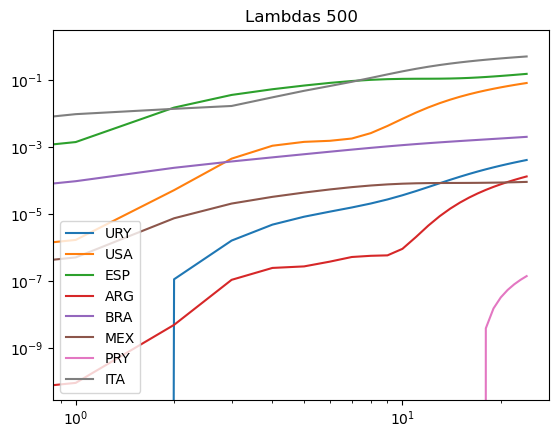

<Figure size 640x480 with 0 Axes>

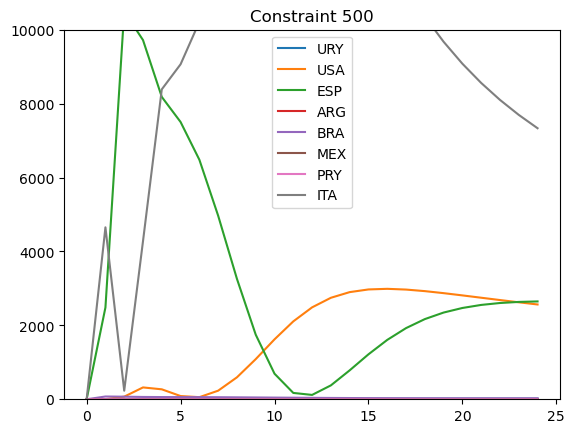

In [2]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pickle

cwd = os.getcwd()
# file = '2023-11-2708:16:36_data'
file = '2023-11-2709:03:59_data'
file = '2023-11-2709:20:57_data'
file = '2023-11-2709:37:34_data'
file = '2023-11-2710:28:57_data'

file = file +'.pkl'
file_path = cwd+'/crosslearning/output/'+file

with open(file_path, "rb") as pickle_file:
    loaded_data = pickle.load(pickle_file)

legend = []
for key in loaded_data['CLFunctional']:
    countries = loaded_data['CLFunctional'][key]
    plt.figure()
    for country in countries:
        plt.plot(loaded_data['CLFunctional'][key][country]['lambdas'])
        legend += [country]
    plt.legend(legend)
    plt.title('Lambdas '+key)
    plt.loglog(True)

plt.figure()
legend = []
for key in loaded_data['CLFunctional']:
    plt.figure()
    countries = loaded_data['CLFunctional'][key]
    for country in countries:
        plt.plot(loaded_data['CLFunctional'][key][country]['constraint'])
        print(country,loaded_data['CLFunctional'][key][country]['constraint'][-1] )
        legend += [country]
    plt.legend(legend)
    plt.title('Constraint '+key)
    plt.ylim(0, 10000)
# plt.show()
# for key in loaded_data['CLParametric']:
#     countries = loaded_data['CLParametric'][key]
#     for country in countries:
#         print(country, loaded_data['CLParametric'][key][country])

# print('Totals')
# totalCent = 
# totalInd
# total

for country in countries:
    print(f"Country {country}")
    print(f"For Centralized train error {loaded_data['centralized'][country]['train']} and test error {loaded_data['centralized'][country]['test']}" )
    print(f"For Independent train error {loaded_data['independent'][country]['train']} and test error {loaded_data['independent'][country]['test']}" )
    # print('Parametric')
    for epsilon in loaded_data['epsilonsParametric']:
        print(f"For Parametric with epsilon {epsilon} train error {loaded_data['CLParametric'][str(epsilon)][country]['train']} and test error {loaded_data['CLParametric'][str(epsilon)][country]['test']}" )
    # print('Functional')
    for epsilon in loaded_data['epsilonsFunctional']:
        print(f"For Functional with epsilon {epsilon} train error {loaded_data['CLFunctional'][str(epsilon)][country]['train']} and test error {loaded_data['CLFunctional'][str(epsilon)][country]['test']}" )
        print(f"Functional error {loaded_data['CLFunctional'][str(epsilon)][country]['constraint'][-1]}")


print('Parametric Constraint')
for key in loaded_data['CLParametric']:
    # print(loaded_data['CLParametric'][key]['beta'],loaded_data['CLParametric'][key]['gamma'])
    estimators = np.array([loaded_data['CLParametric'][key]['beta'][0],loaded_data['CLParametric'][key]['gamma'][0]])
    estimator_cl = np.array([loaded_data['CLParametric'][key]['beta'][1],loaded_data['CLParametric'][key]['gamma'][1]])

    # print(estimators.shape,estimator_cl.shape)
    print(key,float(key)**2,np.linalg.norm(estimators-estimator_cl[:,np.newaxis], axis=0)**2)

